<a href="https://colab.research.google.com/github/LucianaPeroni/Metodo-Voyager_Projeto1/blob/main/Projeto_1__M%C3%A9todo_Voyager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Entendimento do Problema
Que pergunta eu quero responder? É algo preditivo?


# Etapa 2: Coleta de dados

Aonde vou conseguir os dados para este projeto? Quais as fontes?

Kaggle:Venda de Video Games: https://www.kaggle.com/gregorut/videogamesales

In [7]:
df = pd.read_csv("vendas_videogames.csv")

# Etapa 3: Análise Exploratória dos Dados (EDA)

O que posso compreender com estes dados?

In [224]:
#Manipulação de dados
import pandas as pd
import numpy as np


#Visualização de dados
import missingno
import seaborn as sns
import matplotlib.pyplot as plt 

#Calculos Estatísticos
from scipy import stats

Primeira Inspeção:

In [9]:
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [10]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
#observações: 
#1- no total de 16598 linhas e 11 colunas, a coluna rank que inicia em 1 deveria encerrar em 16598, mas encerra em 16600...há provavelmente repetições de números
#2- a coluna ano está qualificada como float64 e deveria ser um int
#3- Há dados faltants nas colunas Year e Publisher



In [14]:
df.shape

(16598, 11)

In [15]:
rows, columns = df.shape

In [16]:
print(f'Rows:{rows}')

Rows:16598


**Dicionário de dados** 

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

---





# Informações Estatísticas

In [17]:
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [18]:
df.describe(include='all').round(2)# para entendimento dos dados númericos e não numéricos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16598,16598,16327.00,16598,16540,16598.00,16598.00,16598.00,16598.00,16598.00
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.61,NaN,NaN,2006.41,NaN,NaN,0.26,0.15,0.08,0.05,0.54
std,4791.85,NaN,NaN,5.83,NaN,NaN,0.82,0.51,0.31,0.19,1.56
min,1.00,NaN,NaN,1980.00,NaN,NaN,0.00,0.00,0.00,0.00,0.01
25%,4151.25,NaN,NaN,2003.00,NaN,NaN,0.00,0.00,0.00,0.00,0.06
50%,8300.50,NaN,NaN,2007.00,NaN,NaN,0.08,0.02,0.00,0.01,0.17
75%,12449.75,NaN,NaN,2010.00,NaN,NaN,0.24,0.11,0.04,0.04,0.47


In [19]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Dados faltantes:

In [21]:
df.isnull().sum()#maneira de saber o total de dados faltantes

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

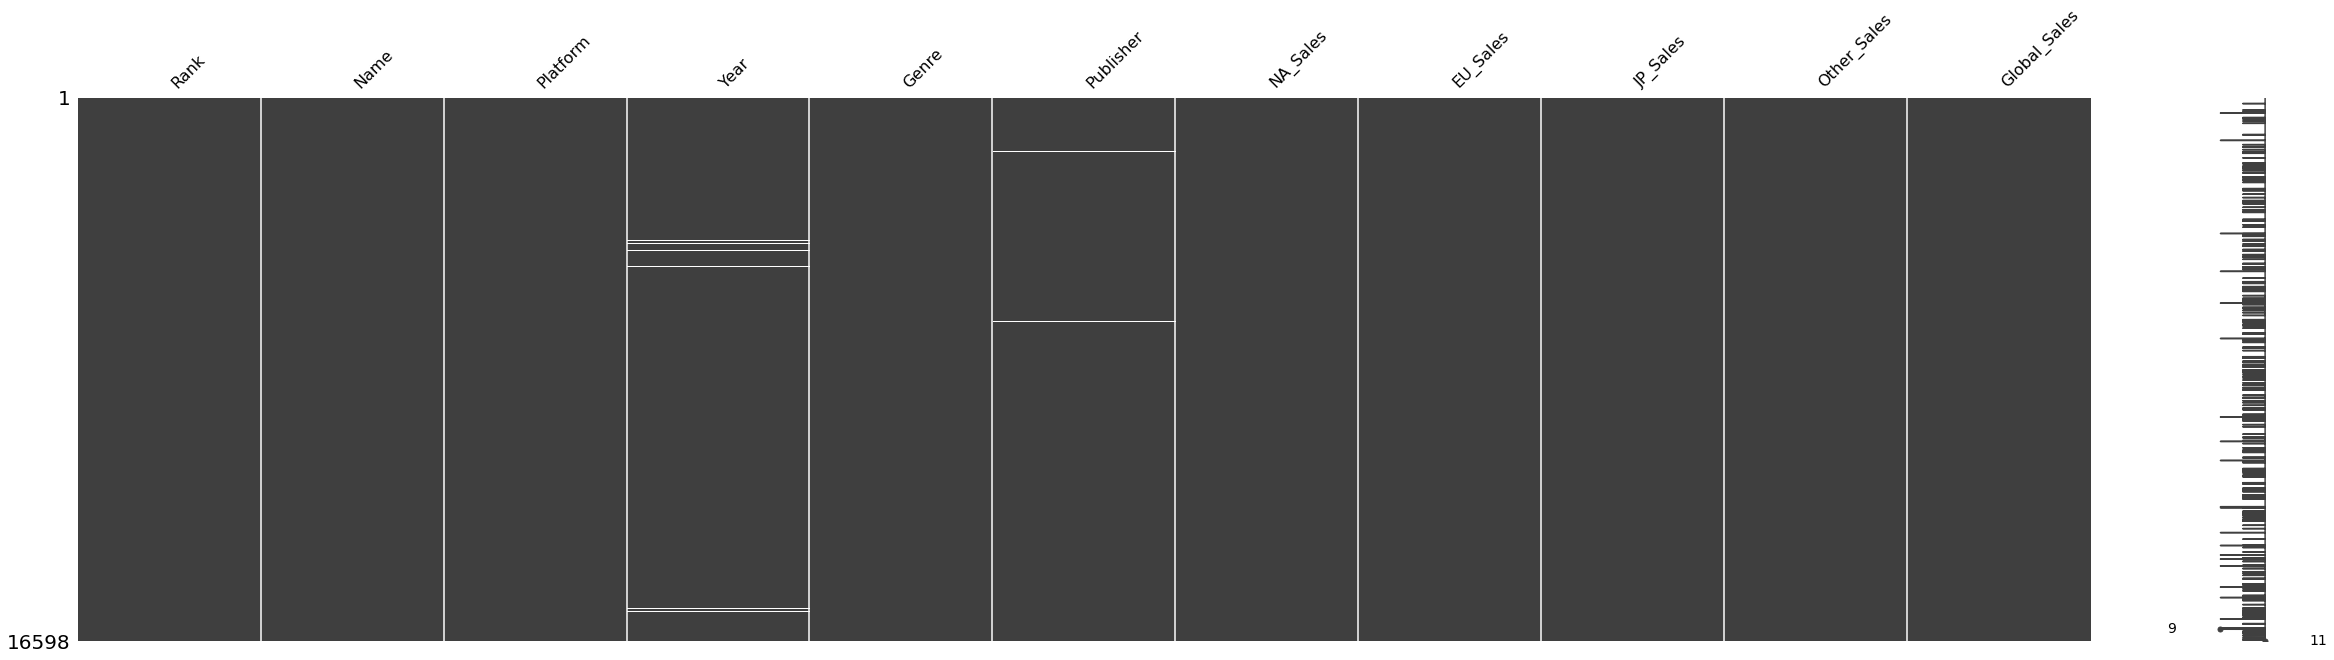

In [22]:
missingno.matrix(df,figsize=(40,10)) #visualização dos dados faltantes

In [23]:
percentual_Nan=(df.isnull().sum()/rows)*100 # % dados faltantes

In [26]:
percentual_Nan.round(3)

Rank            0.000
Name            0.000
Platform        0.000
Year            1.633
Genre           0.000
Publisher       0.349
NA_Sales        0.000
EU_Sales        0.000
JP_Sales        0.000
Other_Sales     0.000
Global_Sales    0.000
dtype: float64

In [ ]:
df[df.isnull().any(axis=1)].head(10) #traz do df qqer linha que tenha ao menos 1 null

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


Duplicadas

In [ ]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


# Features

*Name - Games name:*

In [27]:
df['Name'].nunique() #qtidade

11493

In [28]:
df['Name'].unique() #array unique

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

 - Qual jogo tem maior preço de vendas global?



In [165]:
top_sales_game = df.head(15)

In [166]:
top_sales_game.head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [167]:
top_sales_game = top_sales_game[['Name','Year','Genre','Global_Sales']]

In [168]:
top_sales_game.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.82
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.37


In [169]:
top_sales_game = top_sales_game.sort_values(by=['Global_Sales'], ascending=False)

In [170]:
top_sales_game.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.82
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.37


In [172]:
name_game =top_sales_game['Name']
year_game =top_sales_game['Year']
y=np.arange(0,20)

In [173]:
top_sales_game['Global_Sales'].values

array([82.74, 40.24, 35.82, 33.  , 31.37, 30.26, 30.01, 29.02, 28.62,
       28.31, 24.76, 23.42, 23.1 , 22.72, 22.  ])

<function matplotlib.pyplot.show>

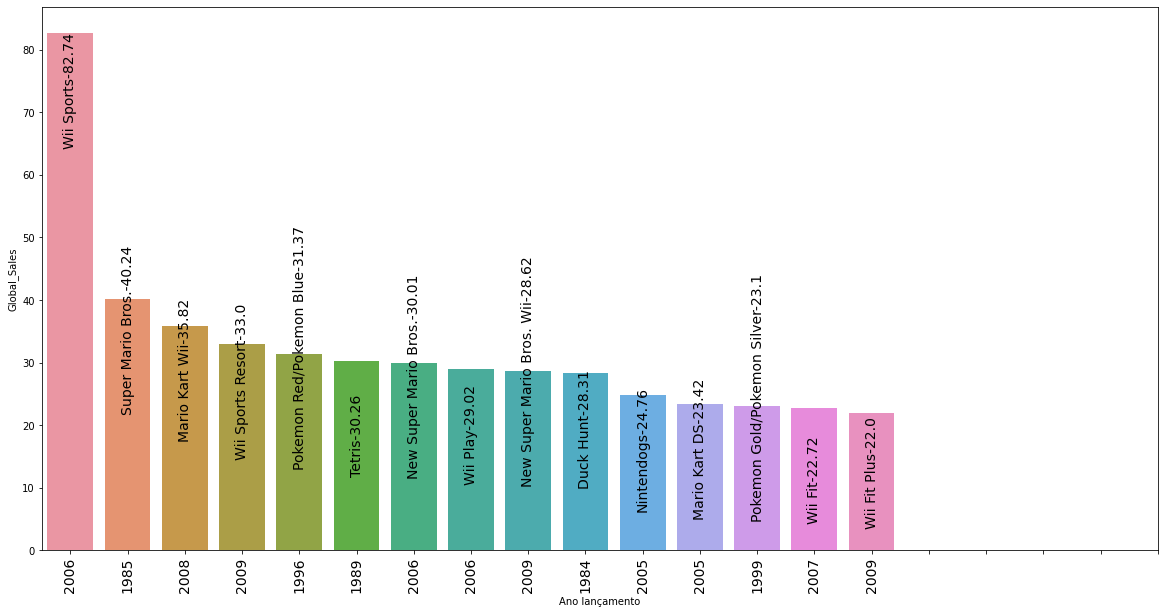

In [174]:
plt.figure(figsize=(20,10))
genre_graph_bar= sns.barplot(x='Name',y='Global_Sales', data= top_sales_game)
index=0
for i in top_sales_game['Global_Sales'].values:
  genre_graph_bar.text(index, i-18, str(name_game[index]+'-'+str(i)), color='#000', size=14, rotation=90, ha='center')
  index+=1
plt.xticks( y, top_sales_game['Year'],fontsize=14, rotation=90)
plt.xlabel('Ano lançamento')
plt.show

*Platform - Platform of the games release:*

In [144]:
df['Platform'].nunique()

31

In [145]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [146]:
df['Platform'].value_counts(ascending=False) # quantos jogos de cada plataforma

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

 - Maior preço de venda por plataforma?

In [147]:
df_platform =df.groupby(by=['Platform'])['Global_Sales'].sum()

In [148]:
df_platform.head()

Platform
2600     97.08
3DO       0.10
3DS     247.46
DC       15.97
DS      822.49
Name: Global_Sales, dtype: float64

In [149]:
df_platform = df_platform.reset_index()

In [150]:
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False)

In [151]:
df_platform.head()

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

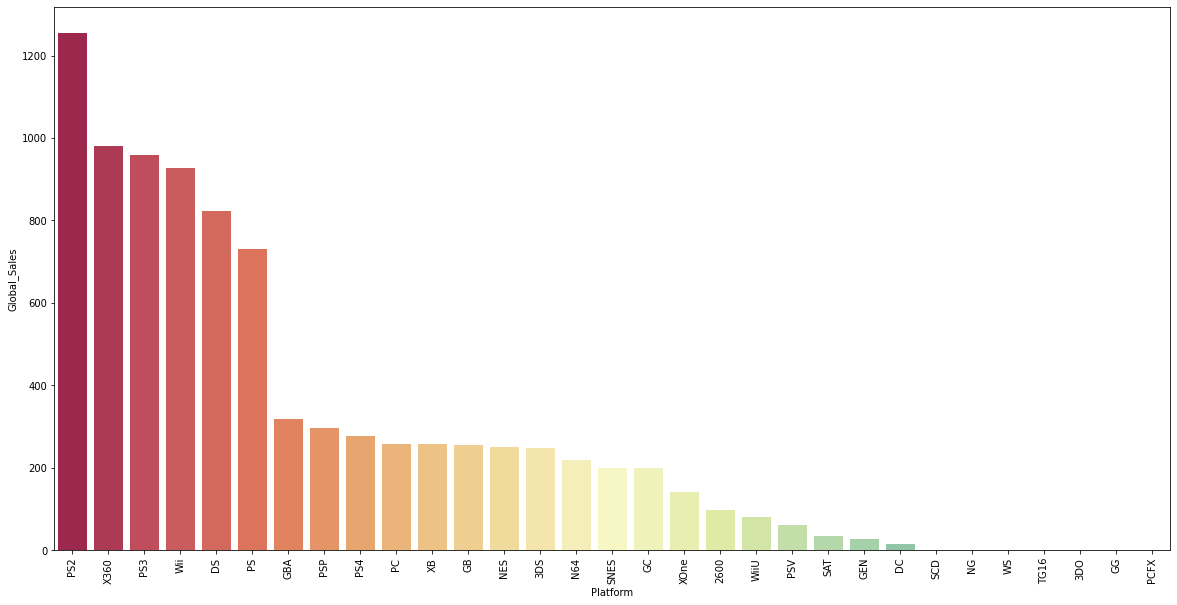

In [152]:
plt.figure(figsize=(20,10))
sns.barplot(x='Platform', y='Global_Sales', data=df_platform,  palette='Spectral')
plt.xticks(rotation=90)

*Year - Ano de Lançamento:*

In [47]:
df['Year'].nunique()


39

In [48]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [49]:
df['Year'].dtypes

dtype('float64')

In [50]:
df.fillna(-1,inplace=True)#replace dos Nan por -1

In [51]:
df['Year']=df['Year'].astype('int64')#transformar o dado em int

In [52]:
df['Year'].dtypes

dtype('int64')

In [53]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- Jogos lançados por ano:




In [54]:
df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False)

Year
 2009    1431
 2008    1428
 2010    1259
 2007    1202
 2011    1139
 2006    1008
 2005     941
 2002     829
 2003     775
 2004     763
 2012     657
 2015     614
 2014     582
 2013     546
 2001     482
 1998     379
 2000     349
 2016     344
 1999     338
 1997     289
-1        271
 1996     263
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
 2017       3
 2020       1
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

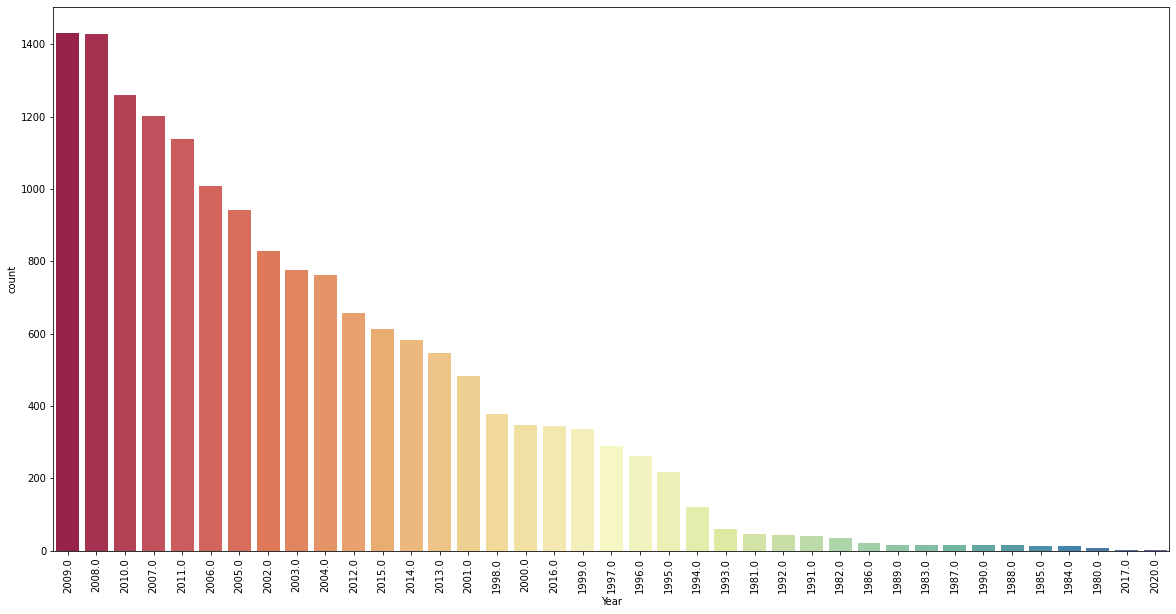

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=df, order=df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, palette='Spectral')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

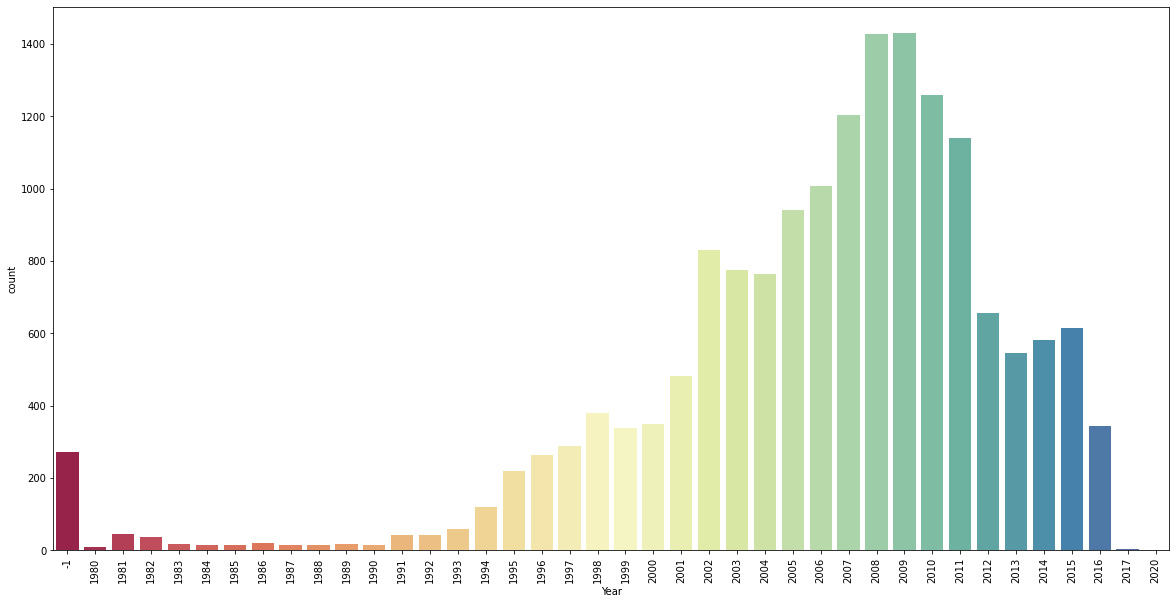

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=df, palette='Spectral')
plt.xticks(rotation=90)

*Genre - Gênero do Jogo:*

In [32]:
df['Genre'].nunique()

12

In [33]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [34]:
df['Genre'].value_counts(ascending=False) # quantidade por genero

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

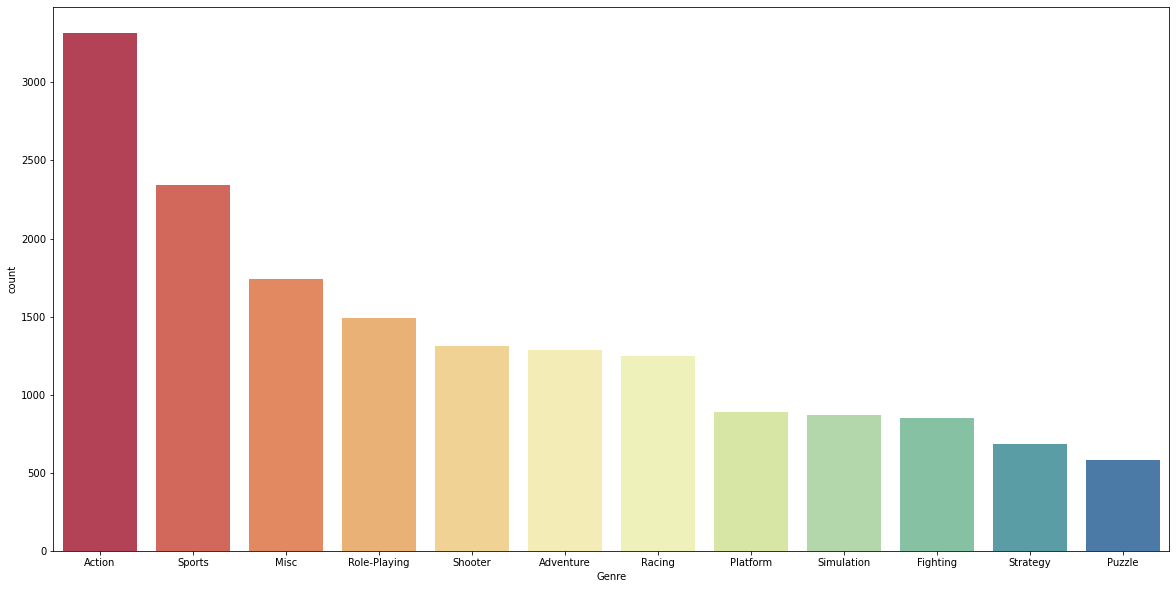

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index,palette='Spectral')

 - Principais gêneros por ano (anos de maiores vendas):

In [ ]:
df['Year'].value_counts().iloc[:3].index #localizou os 3 principais anos

Int64Index([2009, 2008, 2010], dtype='int64')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

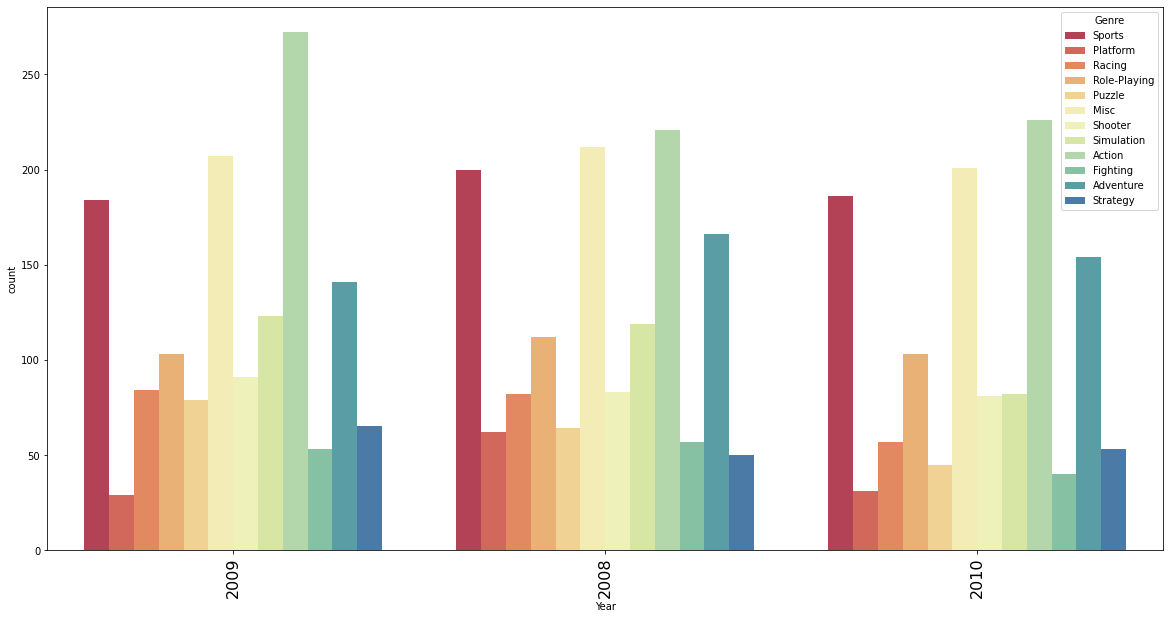

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=df,hue='Genre', order=df['Year'].value_counts().iloc[:3].index,palette='Spectral')
plt.xticks(size=16, rotation=90)

 - Qual gênero de jogo foi mais lançado por ano?

In [114]:
max_year_df = df.groupby(['Year','Genre']).size().reset_index(name='count')


In [115]:
max_year_df.head()

,Year,Genre,count
0,-1,Action,63
1,-1,Adventure,10
2,-1,Fighting,12
3,-1,Misc,29
4,-1,Platform,10


In [116]:
max_year_df.tail()

,Year,Genre,count
396,2016,Sports,38
397,2016,Strategy,10
398,2017,Action,1
399,2017,Role-Playing,2
400,2020,Simulation,1


In [117]:
max_year_idx= max_year_df.groupby(['Year'])['count'].transform(max)==max_year_df['count'] # transform pega o valor max

In [118]:
max_year_idx.head()

0     True
1    False
2    False
3    False
4    False
Name: count, dtype: bool

In [119]:
max_year_genre = max_year_df[max_year_idx].reset_index(drop=True)

In [120]:
max_year_genre

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7
5,1984,Puzzle,3
6,1984,Racing,3
7,1984,Shooter,3
8,1985,Platform,4
9,1985,Puzzle,4


In [121]:
max_year_genre = max_year_genre.drop_duplicates(subset=['Year', 'count'], keep='last').reset_index(drop=True) #tras apenas o genero mais vendido do ano

In [123]:
max_year_genre.head()

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7


In [125]:
genre = max_year_genre['Genre'].values

In [126]:
genre 

array(['Action', 'Misc', 'Action', 'Action', 'Action', 'Shooter',
       'Puzzle', 'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports',
       'Sports', 'Fighting', 'Platform', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

<function matplotlib.pyplot.show>

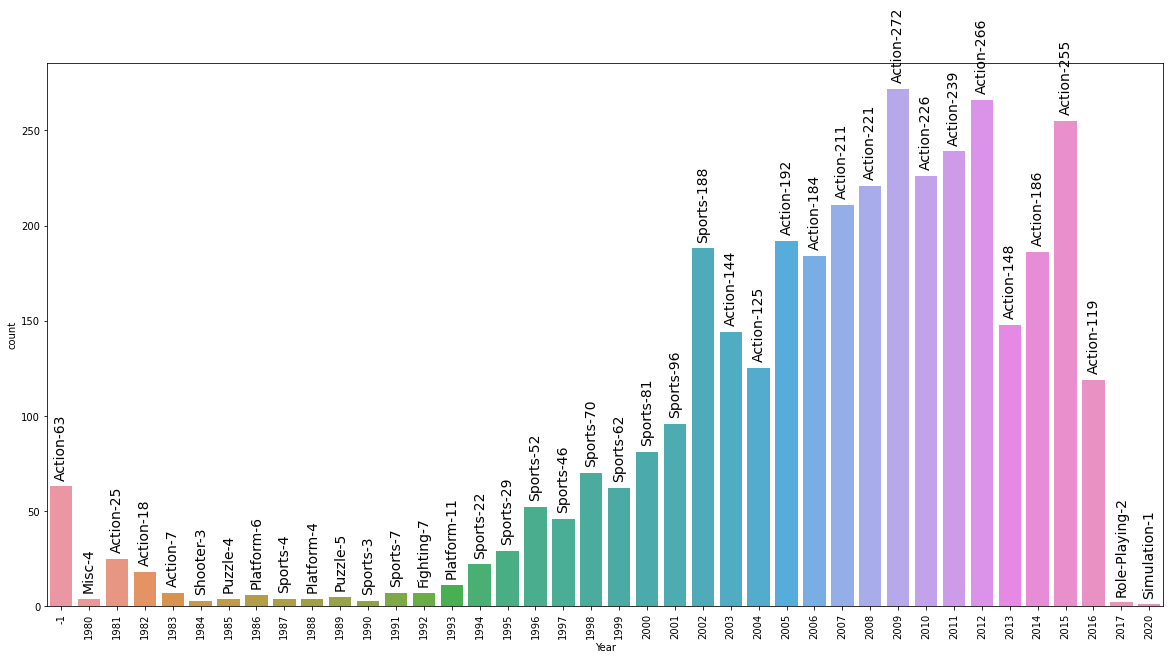

In [127]:
plt.figure(figsize=(20,10))
genre_graph_bar= sns.barplot(x='Year',y='count', data=max_year_genre)
index=0
for i in max_year_genre['count'].values:
  genre_graph_bar.text(index, i+5, str(genre[index]+'-'+str(i)), color='#000', size=14, rotation=90, ha='center')
  index+=1
plt.xticks(rotation=90)
plt.show

 - Qual gênero de jogo foi mais vendido por ano

In [128]:
sales_year_idx= df.groupby(by=['Year','Genre'])['Global_Sales'].sum().reset_index()

In [129]:
sales_year_idx

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,-1,Adventure,4.24
2,-1,Fighting,4.86
3,-1,Misc,12.34
4,-1,Platform,2.22
...,...,...,...
396,2016,Sports,14.60
397,2016,Strategy,0.50
398,2017,Action,0.01
399,2017,Role-Playing,0.04


In [130]:
sales_year = sales_year_idx.groupby(by=['Year'])['Global_Sales'].transform(max)== sales_year_idx['Global_Sales'] 

In [131]:
sales_year

0       True
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399     True
400     True
Name: Global_Sales, Length: 401, dtype: bool

In [132]:
sales_year_max = sales_year_idx[sales_year].reset_index(drop=True)

In [133]:
sales_year_max.head()

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,1980,Shooter,7.07
2,1981,Action,14.84
3,1982,Puzzle,10.03
4,1983,Platform,6.93


In [134]:
genre = sales_year_max['Genre']

<function matplotlib.pyplot.show>

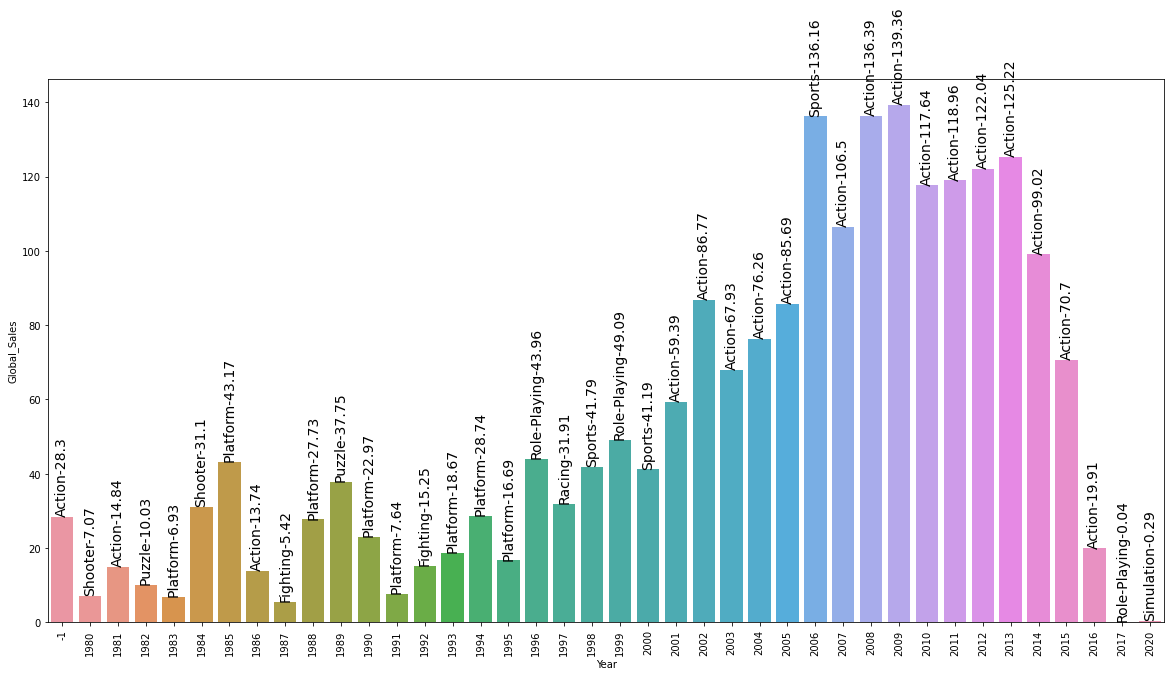

In [135]:
plt.figure(figsize=(20,10))
genre_graph_bar= sns.barplot(x='Year',y='Global_Sales', data=sales_year_max)
index=0
for i in sales_year_max['Global_Sales'].values:
  genre_graph_bar.text(index, i+1, str(genre[index]+'-'+str(round(i,2))), color='#000', size=14, rotation=90, ha='center')
  index+=1
plt.xticks(rotation=90)
plt.show

 - Qual jogo de maior preço global:

In [136]:
df_genre=df.groupby(by=['Genre'])['Global_Sales'].sum()

In [137]:
df_genre

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [138]:
df_genre = df_genre.reset_index()

In [139]:
df_genre = df_genre.sort_values(by='Global_Sales', ascending=False)

In [140]:
df_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

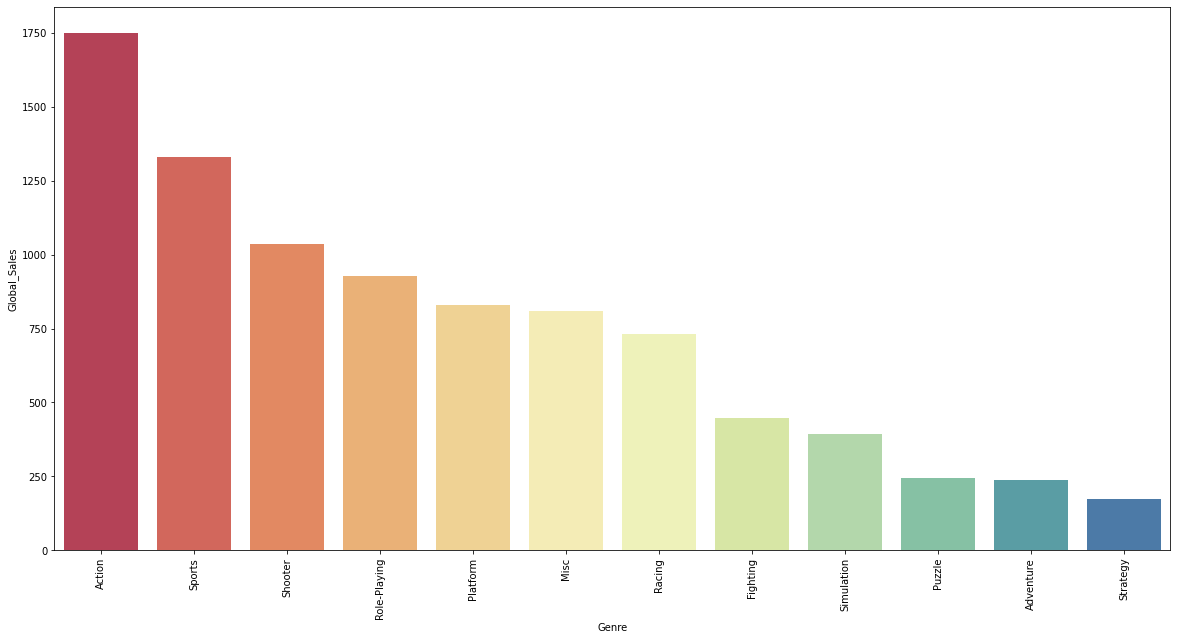

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(x='Genre', y='Global_Sales', data=df_genre, palette='Spectral')
plt.xticks(rotation=90)

*Publisher -Editora do jogo:*

In [35]:
df['Publisher'].nunique()

578

In [36]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [193]:
df['Publisher'].value_counts(ascending=False)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Glams                              1
Locus                              1
Warp                               1
Elite                              1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64

 - Principais vendas Publisher/Global sales

In [202]:
sales_publisher = df[['Publisher','Global_Sales']]

In [203]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37


In [204]:
sales_publisher = sales_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

In [205]:
sales_publisher.head()

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

In [206]:
sales_publisher = pd.DataFrame(sales_publisher).reset_index()

In [207]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

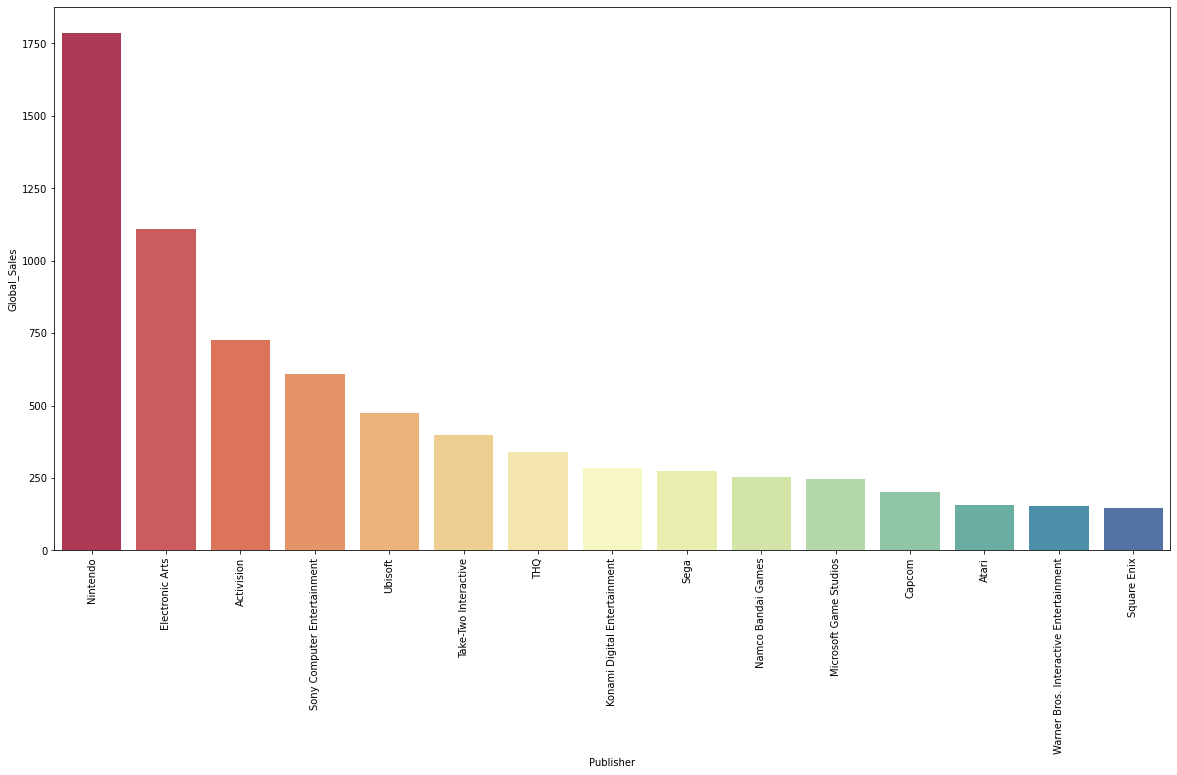

In [209]:
plt.figure(figsize=(20,10))
sns.barplot(x='Publisher', y='Global_Sales', data=sales_publisher.head(15),palette='Spectral')
plt.xticks(rotation=90)

*NA_Sales - vendas América Norte*

In [39]:
df['NA_Sales'].sum()

4392.950000000001

In [38]:
df['NA_Sales'].describe()

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [ ]:
df['NA_Sales'].sort_values(ascending=False)

0        41.49
1        29.08
9        26.93
5        23.20
2        15.85
         ...  
8808      0.00
8799      0.00
8795      0.00
13576     0.00
5816      0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [61]:
df[df['NA_Sales']==0.00] #filtra a coluna com 0 vendas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.0,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01


In [62]:
df[df['NA_Sales'] == 41.49] #linha com maior venda referente ao NA_Sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<function matplotlib.pyplot.show>

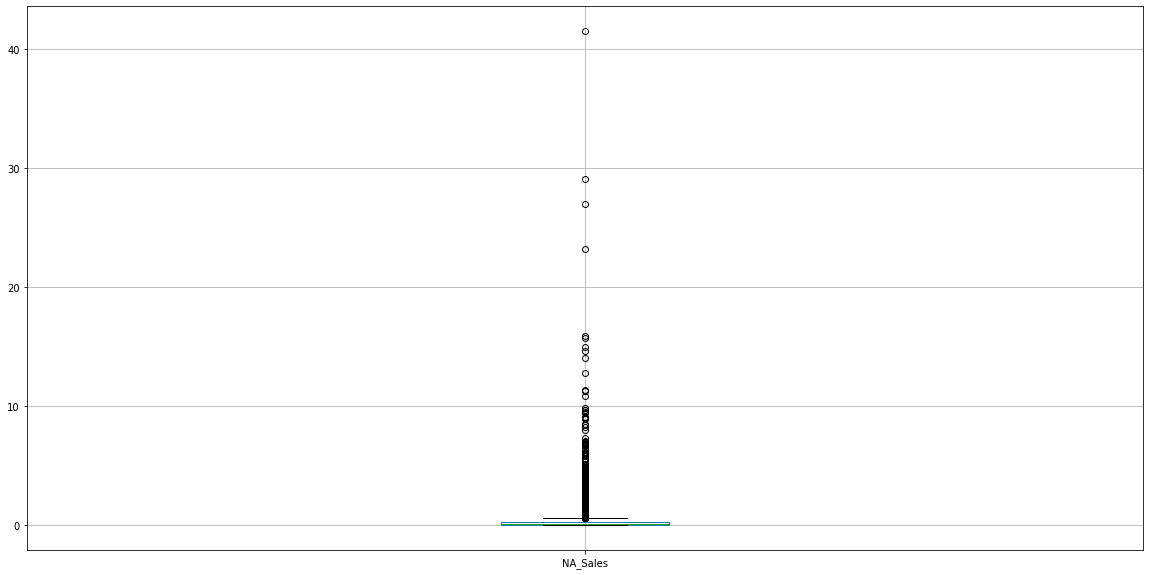

In [57]:
plt.figure(figsize=(20,10))
df.boxplot('NA_Sales')
plt.show # atenção aos outliers

In [63]:
df_nasales_years=df.groupby(by=['Year'])['NA_Sales'].sum() #agrupsmenyo por vendas NA_Sales/ano

In [64]:
df_nasales_years.head()

Year
-1       59.52
 1980    10.59
 1981    33.40
 1982    26.92
 1983     7.76
Name: NA_Sales, dtype: float64

In [65]:
df_nasales_years = df_nasales_years.reset_index()

In [66]:
df_nasales_years.head()

,Year,NA_Sales
0,-1,59.52
1,1980,10.59
2,1981,33.40
3,1982,26.92
4,1983,7.76


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

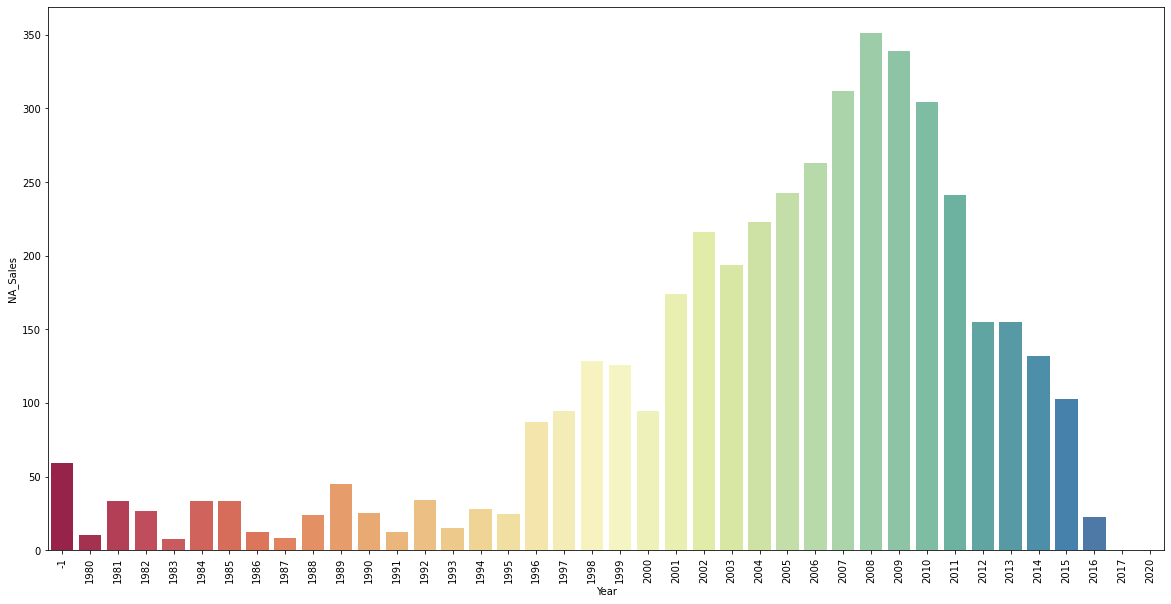

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='NA_Sales', data=df_nasales_years,palette='Spectral')
plt.xticks(rotation=90)

*EU_Sales - vendas na Europa*

In [ ]:
df['EU_Sales'].sum()

2434.1299999999997

In [68]:
df['EU_Sales'].describe()

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [69]:
df['EU_Sales'].sort_values(ascending=False)

0        29.02
2        12.88
3        11.01
10       11.00
16        9.27
         ...  
12566     0.00
12565     0.00
12564     0.00
12563     0.00
16597     0.00
Name: EU_Sales, Length: 16598, dtype: float64

In [70]:
df[df['EU_Sales']==0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
147,148,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.0,2.33,1.74,5.95
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.0,4.87,0.00,4.87
265,266,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,Konami Digital Entertainment,1.46,0.0,0.83,1.93,4.23
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.0,0.09,0.00,4.12
312,313,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.0,3.77,0.00,3.87
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.0,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.0,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.0,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.0,0.00,0.00,0.01


In [71]:
df[df['EU_Sales']==29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<function matplotlib.pyplot.show>

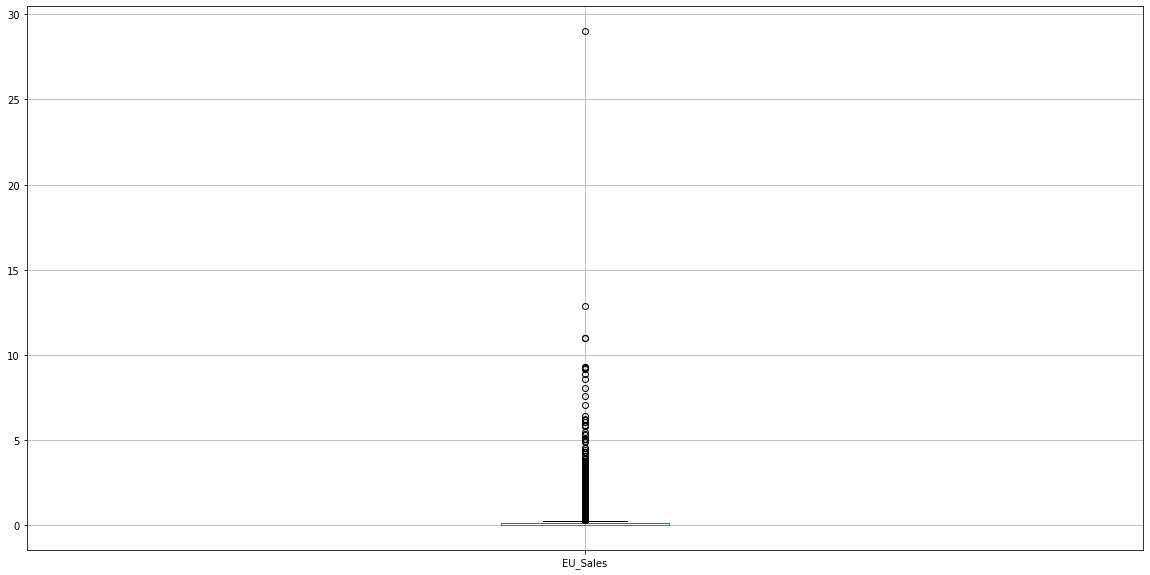

In [72]:
plt.figure(figsize=(20,10))
df.boxplot('EU_Sales')
plt.show #atenção aos outliers

In [73]:
df_eusales_years=df.groupby(by=['Year'])['EU_Sales'].sum()

In [74]:
df_eusales_years.head()

Year
-1       25.01
 1980     0.67
 1981     1.96
 1982     1.65
 1983     0.80
Name: EU_Sales, dtype: float64

In [75]:
df_eusales_years = df_eusales_years.reset_index()

In [76]:
df_eusales_years.head()

,Year,EU_Sales
0,-1,25.01
1,1980,0.67
2,1981,1.96
3,1982,1.65
4,1983,0.80


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

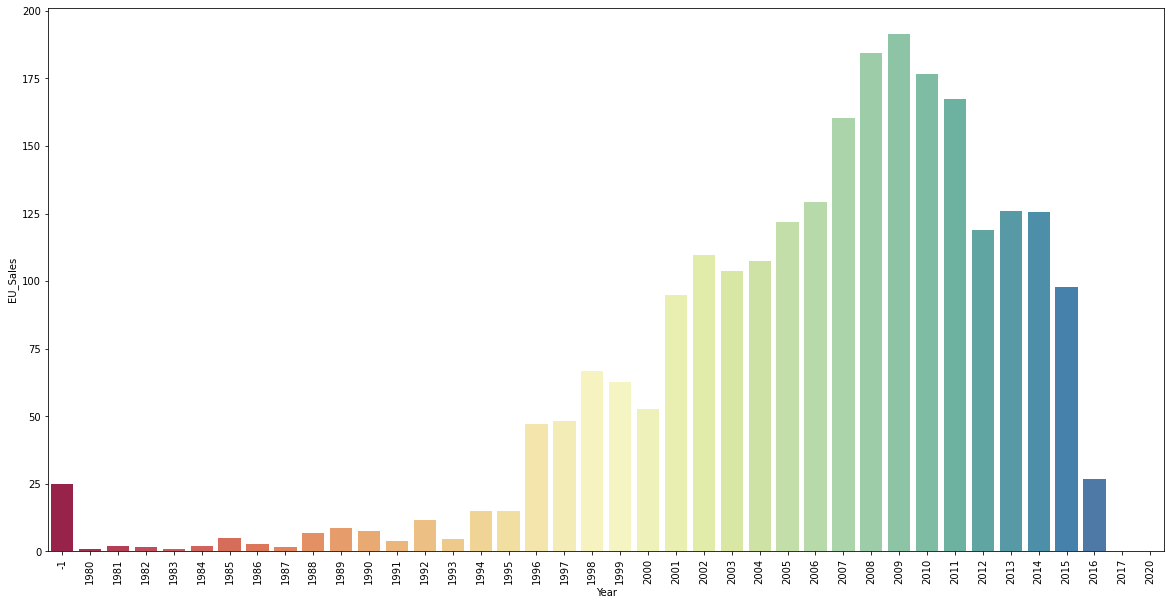

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='EU_Sales', data=df_eusales_years,palette='Spectral')
plt.xticks(rotation=90)

*JP_Sales - Vendas no Japão*

In [79]:
df['JP_Sales'].sum()

1291.0200000000002

In [80]:
df['JP_Sales'].describe()

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [81]:
df['JP_Sales'].sort_values(ascending=False)

4        10.22
12        7.20
1         6.81
6         6.50
20        6.04
         ...  
7166      0.00
7167      0.00
7168      0.00
7172      0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64

In [82]:
df[df['JP_Sales']==0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
60,61,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.0,1.07,10.26
83,84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
98,99,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.0,0.69,7.37
102,103,Just Dance,Wii,2009,Misc,Ubisoft,3.51,3.03,0.0,0.73,7.27
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01


In [83]:
df[df['JP_Sales']==10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


<function matplotlib.pyplot.show>

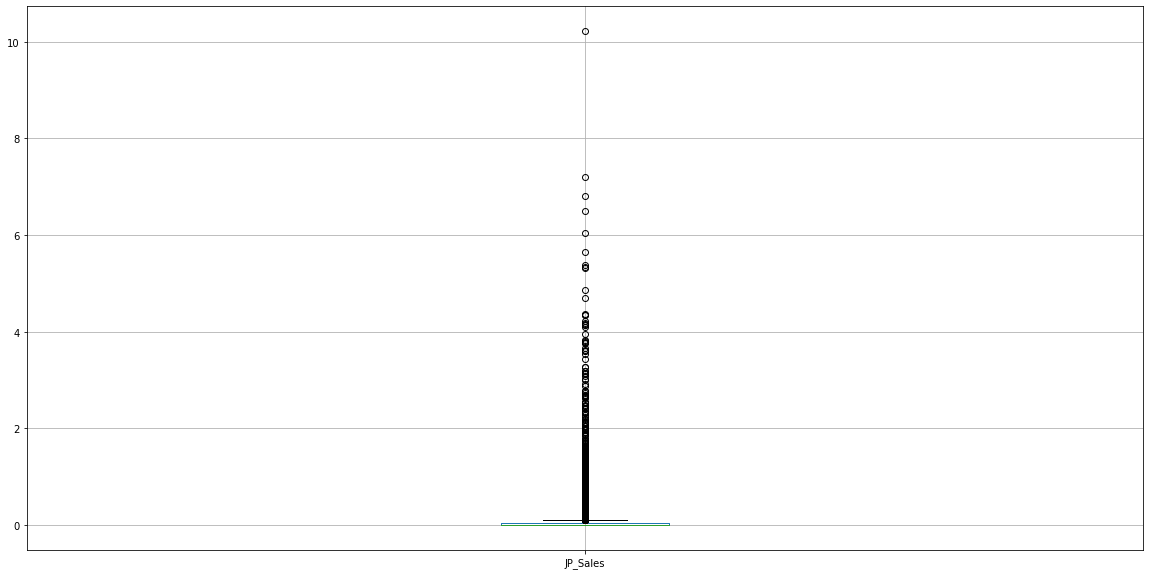

In [84]:
plt.figure(figsize=(20,10))
df.boxplot('JP_Sales')
plt.show #atenção aos outliers

In [85]:
df_jpsales_years=df.groupby(by=['Year'])['JP_Sales'].sum()

In [86]:
df_jpsales_years.head()

Year
-1       6.72
 1980    0.00
 1981    0.00
 1982    0.00
 1983    8.10
Name: JP_Sales, dtype: float64

In [87]:
df_jpsales_years = df_jpsales_years.reset_index()

In [88]:
df_jpsales_years.head()

,Year,JP_Sales
0,-1,6.72
1,1980,0.00
2,1981,0.00
3,1982,0.00
4,1983,8.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

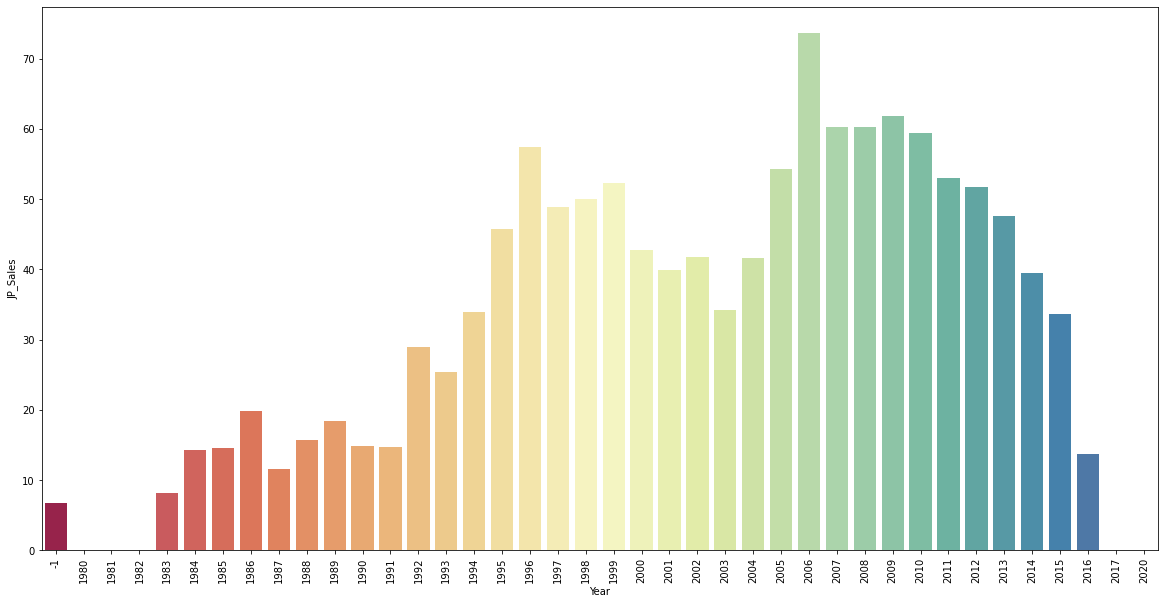

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='JP_Sales', data=df_jpsales_years,palette='Spectral')
plt.xticks(rotation=90)

*Other_Sales - Vendas no resto do mundo*



In [90]:
df['Other_Sales'].sum()

797.7500000000001

In [91]:
df['Other_Sales'].describe()

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [92]:
df['Other_Sales'].sort_values(ascending=False)

17       10.57
0         8.46
47        7.53
16        4.14
2         3.31
         ...  
12050     0.00
12049     0.00
12048     0.00
4414      0.00
16597     0.00
Name: Other_Sales, Length: 16598, dtype: float64

In [93]:
df[df['Other_Sales']==0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
137,138,World of Warcraft,PC,2004,Role-Playing,Activision,0.07,6.21,0.00,0.0,6.28
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.0,4.87
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.0,4.12
288,289,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,Activision,2.57,1.52,0.00,0.0,4.09
312,313,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.00,3.77,0.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


In [102]:
df['Other_Sales'].max()

10.57

<function matplotlib.pyplot.show>

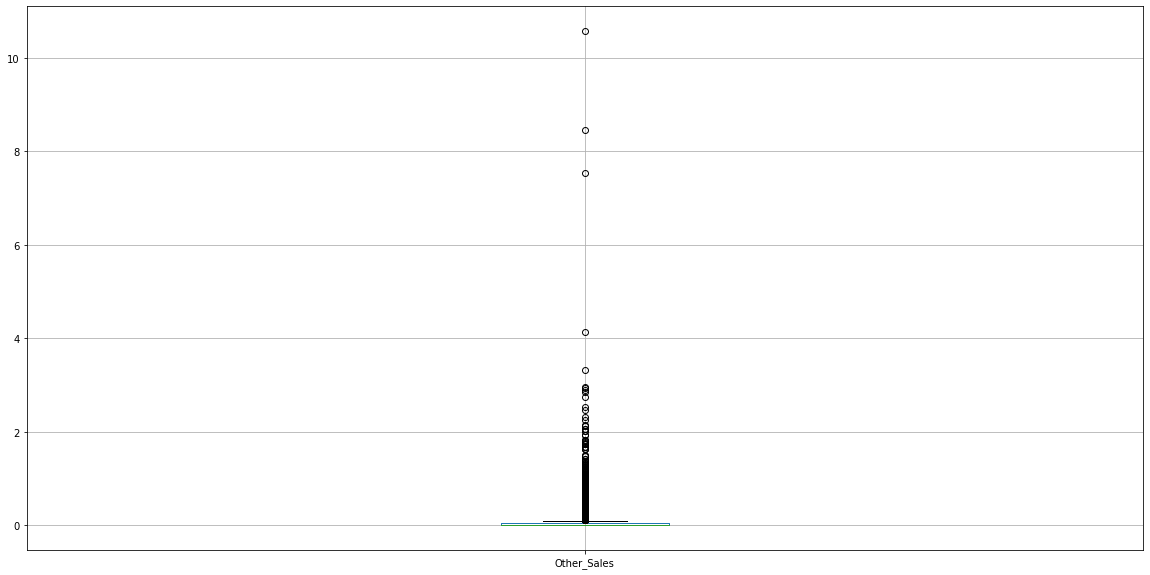

In [95]:
plt.figure(figsize=(20,10))
df.boxplot('Other_Sales')
plt.show #atenção aos outliers

In [96]:
df_otsales_years=df.groupby(by=['Year'])['Other_Sales'].sum()

In [97]:
df_otsales_years.head()

Year
-1       8.74
 1980    0.12
 1981    0.32
 1982    0.31
 1983    0.14
Name: Other_Sales, dtype: float64

In [98]:
df_otsales_years = df_otsales_years.reset_index()

In [99]:
df_otsales_years.head()

,Year,Other_Sales
0,-1,8.74
1,1980,0.12
2,1981,0.32
3,1982,0.31
4,1983,0.14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

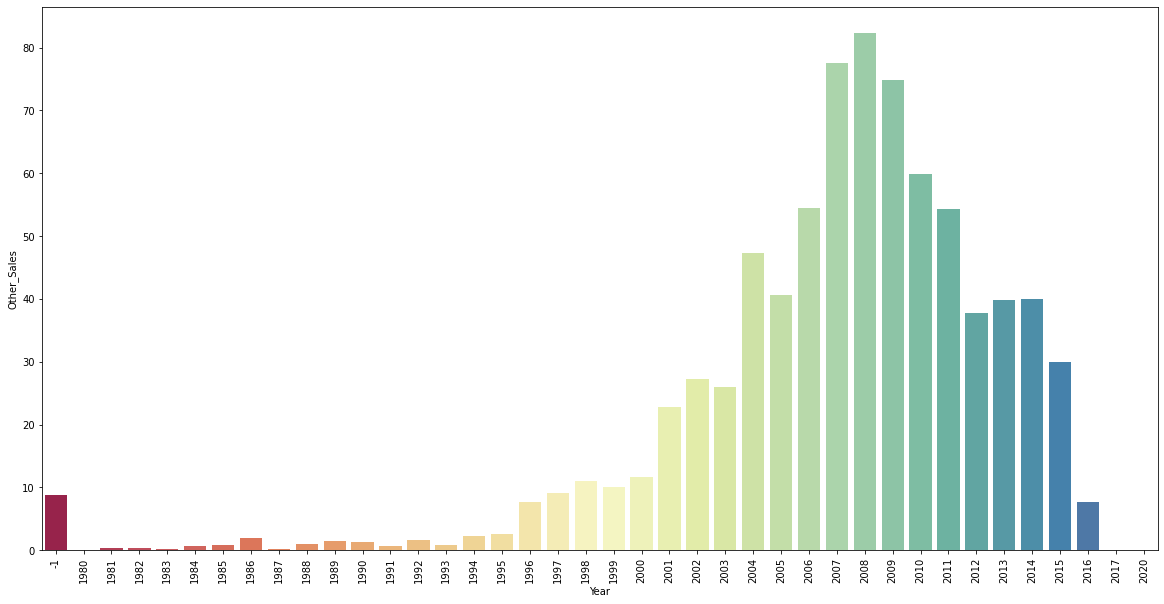

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Other_Sales', data=df_otsales_years,palette='Spectral')
plt.xticks(rotation=90)

*Global_Sales - Total de vendas mundiais*

In [103]:
df['Global_Sales'].sum()

8920.44

In [104]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [105]:
df['Global_Sales'].sort_values(ascending=False)

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16186     0.01
16187     0.01
16188     0.01
16189     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

In [106]:
df[df['Global_Sales']==0.01]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15980,15983,Turok,PC,2008,Action,Touchstone,0.00,0.01,0.00,0.0,0.01
15981,15984,Coven and Labyrinth of Refrain,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
15983,15986,Dragon Zakura DS,DS,2007,Misc,Electronic Arts,0.00,0.00,0.01,0.0,0.01
15984,15987,Chameleon: To Dye For!,DS,2006,Puzzle,505 Games,0.01,0.00,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


In [107]:
df[df['Global_Sales']==82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<function matplotlib.pyplot.show>

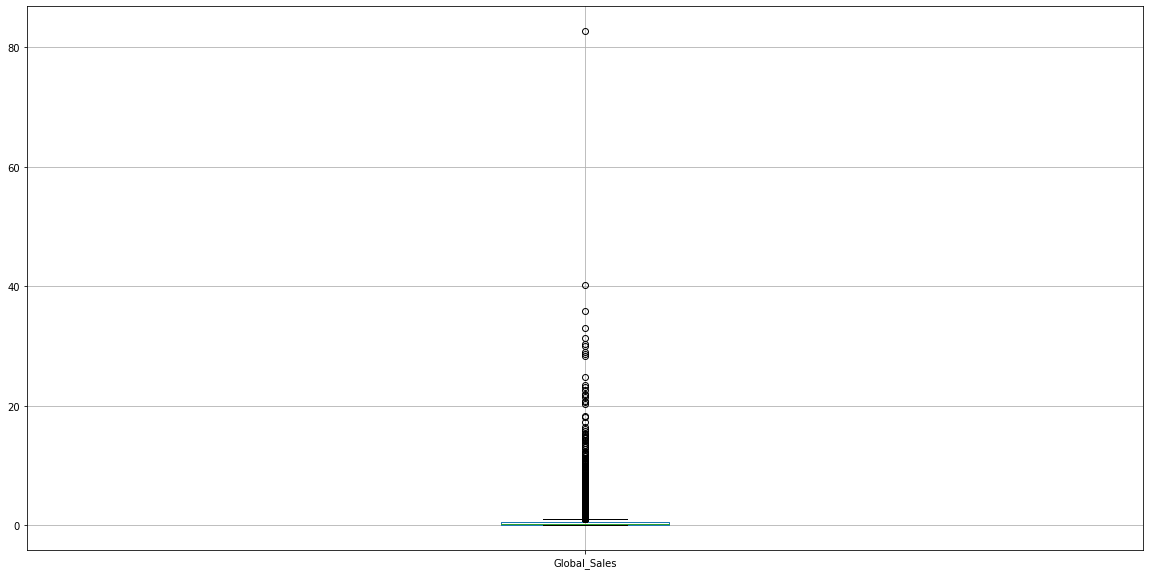

In [108]:
plt.figure(figsize=(20,10))
df.boxplot('Global_Sales')
plt.show #atenção aos outliers

In [109]:
df_glsales_years=df.groupby(by=['Year'])['Global_Sales'].sum()

In [110]:
df_glsales_years.head()

Year
-1       100.08
 1980     11.38
 1981     35.77
 1982     28.86
 1983     16.79
Name: Global_Sales, dtype: float64

In [111]:
df_glsales_years = df_glsales_years.reset_index()

In [112]:
df_glsales_years.head()

,Year,Global_Sales
0,-1,100.08
1,1980,11.38
2,1981,35.77
3,1982,28.86
4,1983,16.79


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

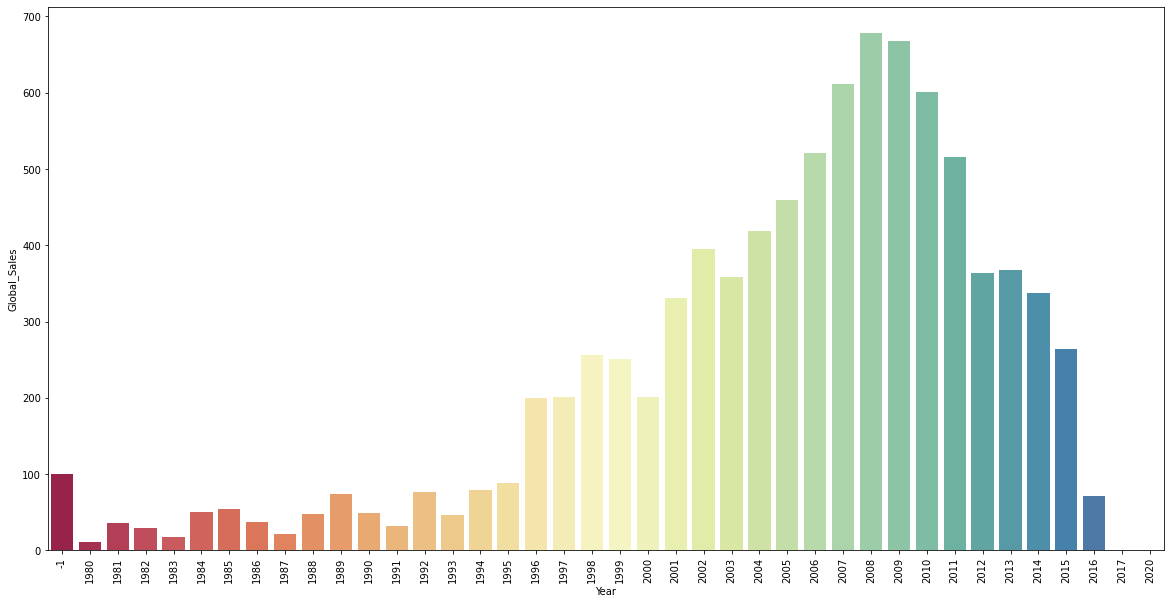

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', data=df_glsales_years,palette='Spectral')
plt.xticks(rotation=90)

 - Global Sales by Region

In [210]:
top_sales_by_countrys = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [211]:
top_sales_by_countrys.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [212]:
top_sales_by_countrys = top_sales_by_countrys.sum().reset_index()

In [213]:
top_sales_by_countrys.head()

,index,0
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [214]:
top_sales_by_countrys = top_sales_by_countrys.rename(columns={'index':'Region', 0: 'Total Sales'}) #rename de colunas

In [215]:
top_sales_by_countrys.head()

,Region,Total Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


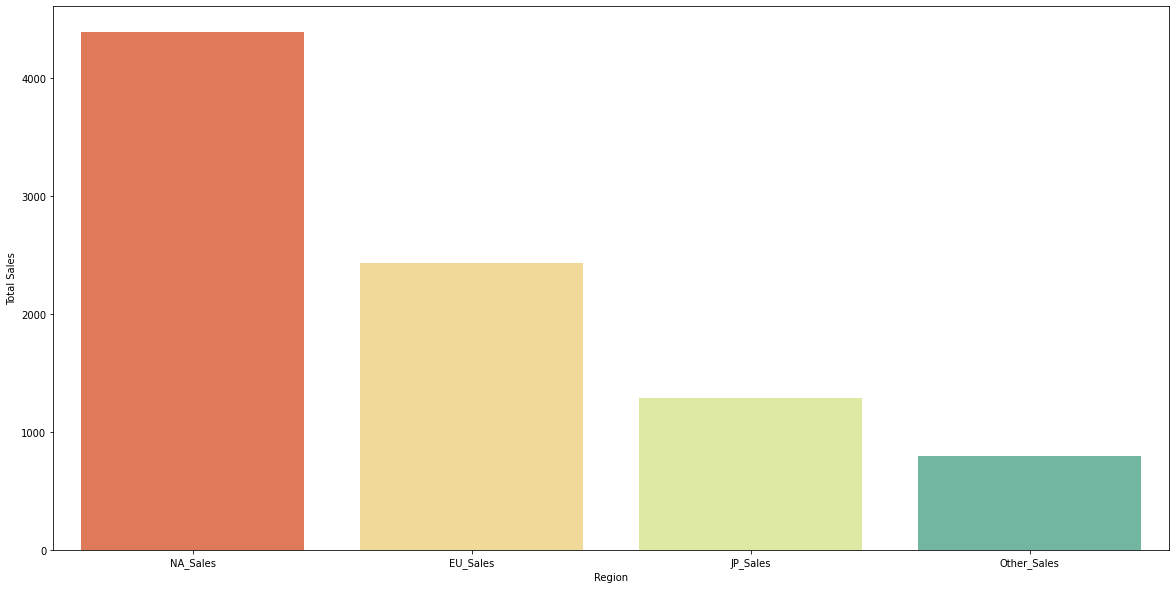

In [216]:
plt.figure(figsize=(20,10))
sns.barplot(x='Region', y='Total Sales', data=top_sales_by_countrys,palette='Spectral')

In [217]:
label = top_sales_by_countrys['Region']

In [218]:
label

0       NA_Sales
1       EU_Sales
2       JP_Sales
3    Other_Sales
Name: Region, dtype: object

In [219]:
total_sales = top_sales_by_countrys['Total Sales']

In [220]:
total_sales

0    4392.95
1    2434.13
2    1291.02
3     797.75
Name: Total Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7f7b53046b90>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

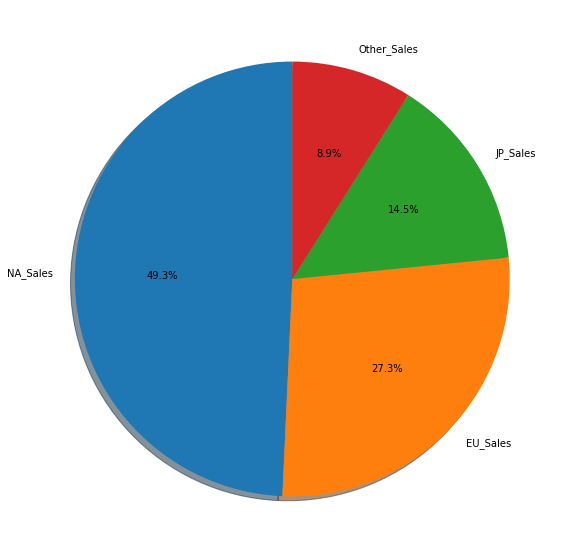

In [221]:
plt.figure(figsize=(20,10))
plt.pie(total_sales, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)

 - Histograma de Vendas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

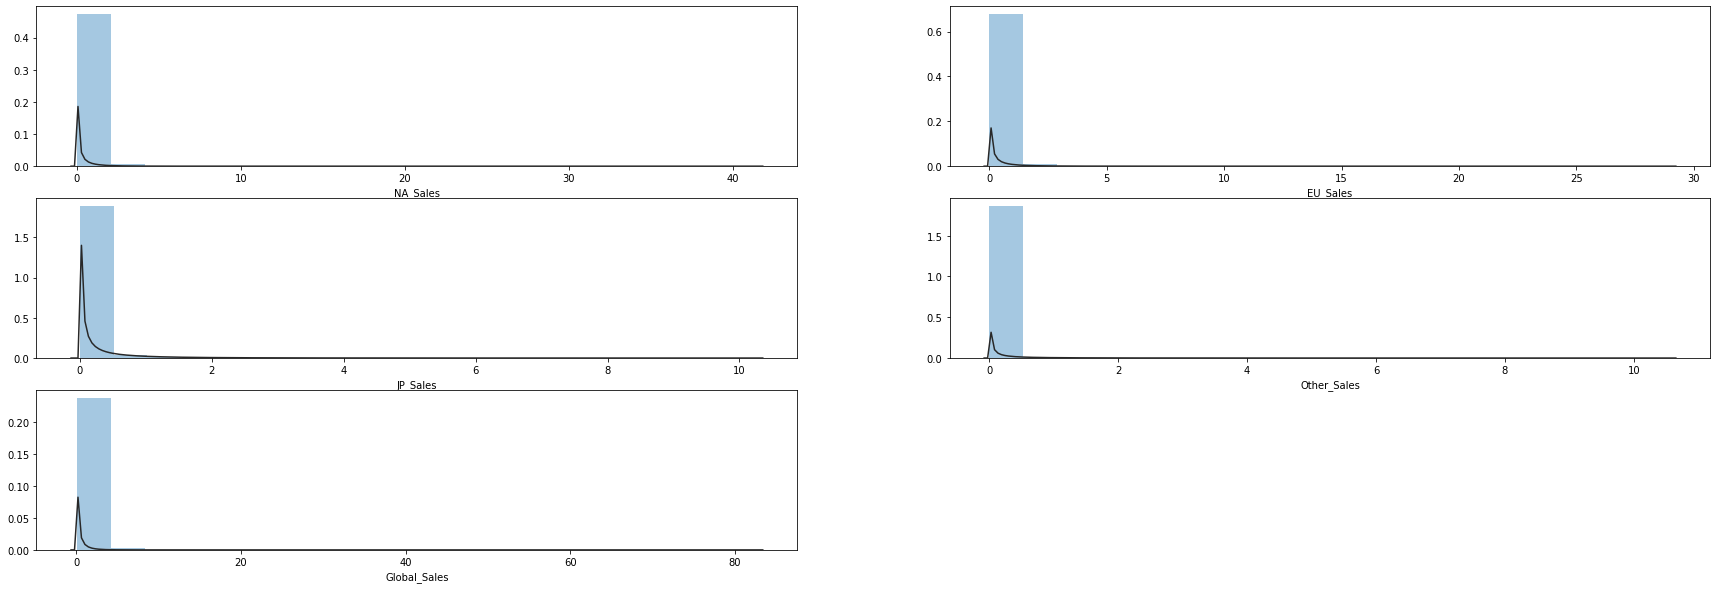

In [228]:
plt.figure(figsize=(30,10))
columns_country = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i, j in enumerate (columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(df[j], bins=20, kde=False, fit=stats.gamma)

In [229]:
df_hist_transform_log = df.copy()

In [232]:
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.NA_Sales!=0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.EU_Sales!=0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Other_Sales!=0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.JP_Sales!=0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Global_Sales!=0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

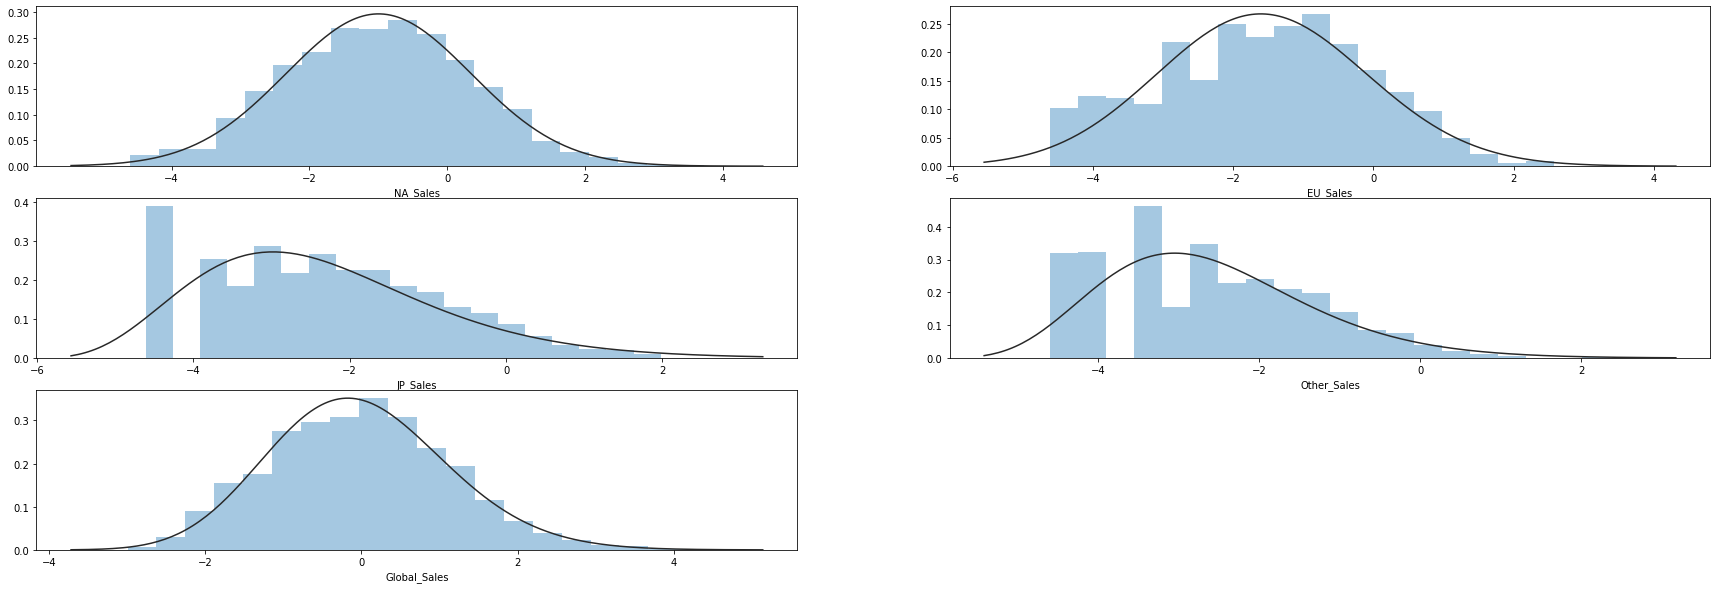

In [233]:
plt.figure(figsize=(30,10))
columns_country = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i, j in enumerate (columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma)

 - Correlação entre Features

In [234]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.008500,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,-0.008500,1.000000,0.005031,0.013993,0.018223,0.011731,0.012232
NA_Sales,-0.401362,0.005031,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.013993,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.018223,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.011731,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,0.012232,0.941047,0.902836,0.611816,0.748331,1.000000


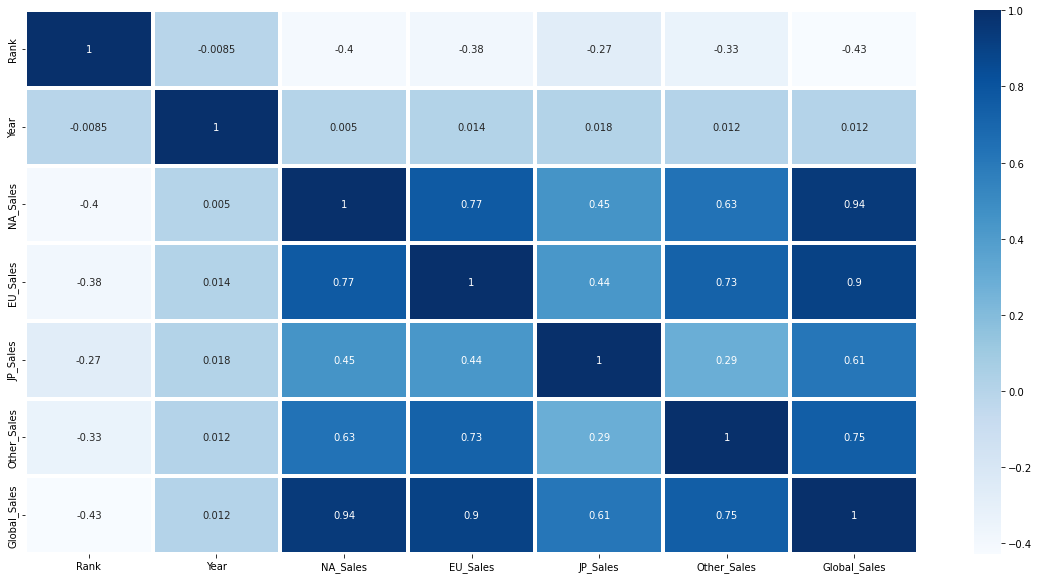

In [235]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='Blues', annot=True, linewidth=3)

- Pairplot

In [237]:
df_pair = df.loc[:, ['Year','Platform','Genre','NA_Sales','EU_Sales','Other_Sales']]

In [238]:
df_pair.head()

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00


<Figure size 1440x720 with 0 Axes>

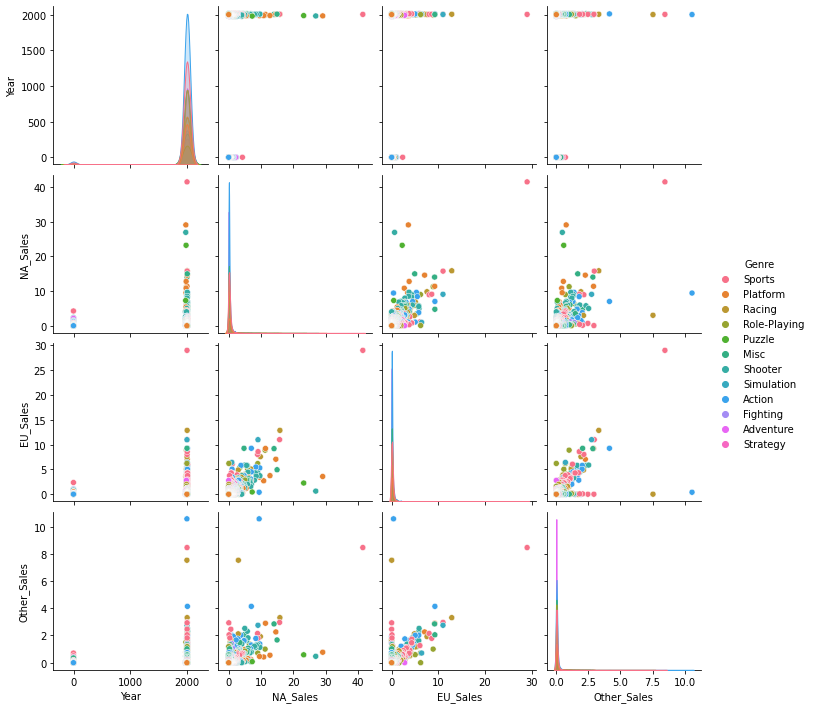

In [239]:
plt.figure(figsize=(20,10))
sns.pairplot(df_pair, hue='Genre')
plt.show()